### 선형회귀 모델
- 입력특성에 대한 선형함수를 만들어 예측을 수행하는 모델
- 단순선형회귀 공식 => y = wx + b
- 다중선형회귀 공식 => y = w1 * x1 + w2 * x2 + b

#### 샘플데이터 생성

In [2]:
import pandas as pd

In [3]:
sample_data = pd.DataFrame([[9,90],[8,80],[4,40],[2,20]],
                            columns=['공부시간','성적'],
                            index=['창선','영화','자연','병관'])
sample_data

,공부시간,성적
창선,9,90
영화,8,80
자연,4,40
병관,2,20


In [4]:
# 입력특성(문제)
X = sample_data['공부시간']
# 정답
y = sample_data['성적']

#### 모델링을 위한 sklearn패키지 활용
- 머신러닝 학습을 위한 모델, 평가지표, 학습용 데이터셋 등을 가지고 있는 파이썬 패키지

In [5]:
# 전통적인 선형회귀 모델을 구현한 클래스
from sklearn.linear_model import LinearRegression

##### 모델링 순서
1. 모델객체 생성
2. 문제/정답 학습
3. 모델 평가
4. 모델 예측

In [6]:
score_model = LinearRegression() # 선형회귀모델 객체 생성

In [7]:
# 문제와 정답 입력
score_model.fit(X.values.reshape(-1,1),  # 1차원 데이터를 2차원으로 변경
                y) 

LinearRegression()

In [8]:
score_model.predict([[7],[5]]) # 예측하고 싶은 입력데이터만 작성

array([70., 50.])

In [9]:
# 학습된 가중치와 절편 확인
print('가중치 : ', score_model.coef_)
print('절편 : ', score_model.intercept_)

가중치 :  [10.]
절편 :  -7.105427357601002e-15


### 다중선형회귀
- 입력특성이 2개 이상인 선형회귀 모델

In [10]:
sample_data['게임시간'] = [2, 5, 8, 15]
sample_data

,공부시간,성적,게임시간
창선,9,90,2
영화,8,80,5
자연,4,40,8
병관,2,20,15


In [11]:
# 입력특성(문제)
X = sample_data[['공부시간','게임시간']]
# 정답
y = sample_data['성적']

In [12]:
# 모델 생성
score_model2 = LinearRegression()
# 모델학습
score_model2.fit(X, y)
# 모델 예측
pre = score_model2.predict([[7,10],[4,1]])
pre

c:\Users\chxss\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([70., 40.])

In [13]:
# 학습된 가중치와 절편 확인
print('가중치 : ', score_model2.coef_)
print('절편 : ', score_model2.intercept_)

가중치 :  [ 1.00000000e+01 -2.79679449e-15]
절편 :  2.842170943040401e-14


### 지수 표기법 설명:
- 기본 구조: aEb 형태로 표현됩니다.
    - a는 **가수(mantissa)**로, 실제 숫자의 유효 숫자를 나타냅니다.
    - E는 "10의 거듭제곱"을 나타내는 기호로 사용됩니다 (e로도 쓰입니다).
    - b는 **지수(exponent)**로, 10을 몇 번 곱할지를 나타냅니다.
####예시 해석:
1. 1.00000000e+01:
- 여기서 1.00000000이 가수이고, +01은 지수입니다.
- 이는 1.00000000 × 10^1을 의미합니다.
- 결과적으로 1.00000000e+01은 10과 동일한 값입니다.
2. -2.79679449e-15:
- 여기서 -2.79679449가 가수이고, -15는 지수입니다.
- 이는 -2.79679449 × 10^(-15)을 의미합니다.
- 10^(-15)는 0.000000000000001과 같으므로, 이 값은 매우 작은 수인 -0.00000000000000279679449과 동일합니다.
3. 2.842170943040401e-14:
- 여기서 2.842170943040401이 가수이고, -14는 지수입니다.
- 이는 2.842170943040401 × 10^(-14)을 의미합니다.
- 10^(-14)는 0.00000000000001과 같으므로, 이 값도 역시 매우 작은 수인 0.00000000000002842170943040401과 동일합니다.

요약:
- 'e+01'이나 'e-15' 같은 표기는 지수 표기법으로, 숫자를 간결하게 나타냅니다.
- e+01은 10^1을 곱하라는 뜻이고, e-15는 10^(-15)를 곱하라는 뜻입니다.
- 이를 통해 아주 큰 수나 아주 작은 수를 간편하게 표현할 수 있습니다.

#### 평균제곱오차 구현하기(Mean Squared Error)
- 선형회귀 모델이 학습하는 과정 또는 결과에 대해서 잘못되었는지 잘되었는지 파악하는 지표로 사용하는 알고리즘
- MSE 같은 알고리즘을 비용합수(Cost function)이라고 부른다
- 생성모델, 자연어처리 모델 등 각 모델에 맞는 비용함수가 구성되어 있다

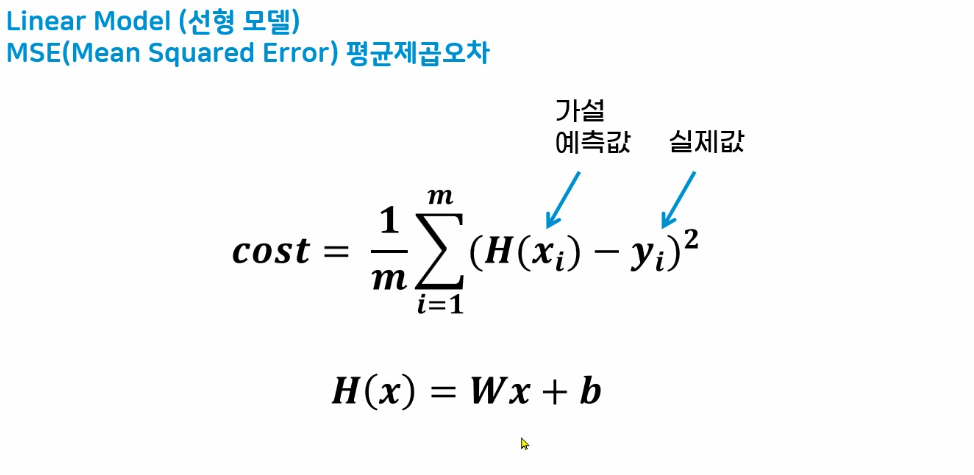

In [14]:
# 선형회귀 가설함수 만들기
def H(X, w) :
    '''
        X : 가설함수로 입력되는 데이터(문제)
        w : 가설함수에서 지정하는 가중치
        return값 : 입력데이터와 가중치의 곱셈 값
    '''
    return X * w

In [15]:
y_pre = H(sample_data['공부시간'], 0.5)
y_pre

창선    4.5
영화    4.0
자연    2.0
병관    1.0
Name: 공부시간, dtype: float64

In [16]:
# 평균제곱 오차함수 만들기
def MSE(X, y, w) :
    '''
        X : MSE 오차를 계산하기 위한 입력데이터(문제)
        y : 실제정답 값
        w : 가설함수에 적용할 가중치 값
    '''
    # 예측 값
    y_pre = H(X, w)
    # 오차 구하기
    error = y_pre - y 
    # 오차의 제곱
    squared_error = error ** 2
    return squared_error.mean() # 평균값 반환

In [17]:
MSE(sample_data['공부시간'], sample_data['성적'],10)

0.0

##### 평균제곱오차 그래프 그려보기
- 최적의 가중치를 가지면 MSE는 최소값을 지닌다.
- 최적의 가중치를 벗어나기 시작하면 MSE는 제곱으로 급격히 증가한다.

In [18]:
w_list = range(0,21)

In [19]:
cost_list = [MSE(sample_data['공부시간'], sample_data['성적'], w) for w in w_list]

In [20]:
cost_list

[4125.0,
 3341.25,
 2640.0,
 2021.25,
 1485.0,
 1031.25,
 660.0,
 371.25,
 165.0,
 41.25,
 0.0,
 41.25,
 165.0,
 371.25,
 660.0,
 1031.25,
 1485.0,
 2021.25,
 2640.0,
 3341.25,
 4125.0]

In [21]:
import matplotlib.pyplot as plt

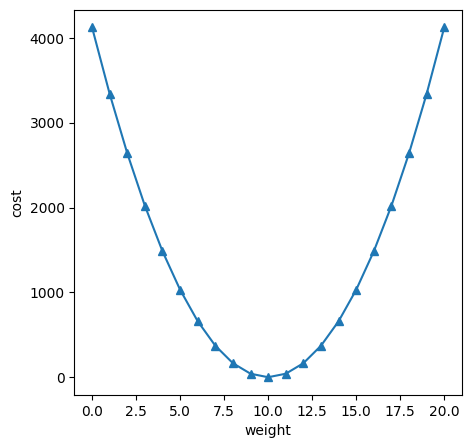

In [22]:
plt.figure(figsize=(5,5)) # 그림 사이즈 설정
plt.plot(range(0,21), # x축 데이터
        cost_list, # y축 데이터
        marker='^'
        )
plt.xlabel('weight')
plt.ylabel('cost')
plt.show()